In [124]:
#Import Libraries :

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
from sklearn.feature_selection import RFE , SelectKBest , mutual_info_classif
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.metrics import mean_squared_error,silhouette_score , accuracy_score , f1_score , r2_score , recall_score , confusion_matrix
import warnings

In [125]:
# Import the data 

file = "C:\\Users\\Mohannad.dawood\\Desktop\\Data_science_Projects\\Churn_Data.csv"
data = pd.read_csv(file )
data.head(2)

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.0,30297.0,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.0,0.0,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0


In [126]:
data.shape

(4708, 15)

In [127]:
# Let us replace the names of the columns 

data.rename  (columns={'Target Churn' : 'Target_Churn', 'Target Code' :'Target_Code'  , 'Current Bill Amt' : 'Current_Bill_Amt' , 'Avg Calls' : 'Avg_Calls',
             'Avg Calls Weekdays' : 'Avg_Calls_Weekdays', 'Account Age' : 'Account_Age', 'Percent Increase MOM' : 'Percent_Increase_MOM', 
             'Acct Plan Subtype' : 'Acct_Plan_Subtype', 'Complaint Code' : 'Complaint_Code', 'Avg Days Delinquent' : 'Avg_Days_Delinquent' , 
             'Current TechSupComplaints' : 'Current_Tech_Sup_Complaints', 'Current Days OpenWorkOrders' : "Current_Days_OpenWorkOrders", 
             'Equipment Age' : 'Equipment_Age', 'Condition of Current Handset' : 'Condition_Current_Handset', 
             'Avg Hours WorkOrderOpenned' : 'Avg_Hours_WorkOrderOpenned'}, inplace=True)
data.head(2)

,Target_Churn,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Acct_Plan_Subtype,Complaint_Code,Avg_Days_Delinquent,Current_Tech_Sup_Complaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_Current_Handset,Avg_Hours_WorkOrderOpenned
0,No Churn,0,14210,17950.0,30297.0,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.0,0.0,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0


#### Let us explore our data 

In [128]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Target_Churn                 4708 non-null   object 
 1   Target_Code                  4708 non-null   int64  
 2   Current_Bill_Amt             4708 non-null   int64  
 3   Avg_Calls                    4708 non-null   float64
 4   Avg_Calls_Weekdays           4708 non-null   float64
 5   Account_Age                  4708 non-null   int64  
 6   Percent_Increase_MOM         4708 non-null   float64
 7   Acct_Plan_Subtype            4708 non-null   object 
 8   Complaint_Code               4701 non-null   object 
 9   Avg_Days_Delinquent          4708 non-null   float64
 10  Current_Tech_Sup_Complaints  4708 non-null   int64  
 11  Current_Days_OpenWorkOrders  4708 non-null   float64
 12  Equipment_Age                4708 non-null   int64  
 13  Condition_Current_

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_Tech_Sup_Complaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_Current_Handset,Avg_Hours_WorkOrderOpenned
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


In [129]:
data['Target_Churn'].value_counts()

No Churn    2421
Churn       2287
Name: Target_Churn, dtype: int64

- Target Churn would be the target of our model 

In [130]:
data['Acct_Plan_Subtype'].value_counts()

Silver    3914
Gold       794
Name: Acct_Plan_Subtype, dtype: int64

- account plan subtype are ordinaly values and will be categorized by Ordinalencode

In [131]:
data['Complaint_Code'].value_counts()

Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

- Complain code would be encoded by OneHotEncoder 

In [132]:
# checking the missing data 
data['Condition_Current_Handset'].isna().value_counts()

False    4264
True      444
Name: Condition_Current_Handset, dtype: int64

we are going to categorize the data through make column transformer 

In [133]:
data['Condition_Current_Handset'].value_counts()

1.0    4186
2.0      74
3.0       4
Name: Condition_Current_Handset, dtype: int64

##### we have many choices to solve the missing data of Condition_Current_Handset:
- remove the missing data which means neglecting 10% approximately from our data 
- remove the column which means neglicting the whole feature which I do not recommend 
- Ask a subject matter experts to find a way to fill the missing data with values ( 1 , 2 , or 3) 

I am going to proceed with the first choice to remove the missing data from the data , and if we discover lately that the feature is not important for our model , we are going to remove the feature 

In [134]:
# delet the missing values 

data.dropna(inplace=True)
data.shape

(4257, 15)

In [135]:
data.columns
ohe_columns = ['Complaint_Code' ]
ord_columns = ['Acct_Plan_Subtype'] # Gold and Silver 
scale_columns = ['Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Avg_Days_Delinquent','Current_Tech_Sup_Complaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Avg_Hours_WorkOrderOpenned']

- Explore Box plot for the data which need to be scaled to remove the outiers 

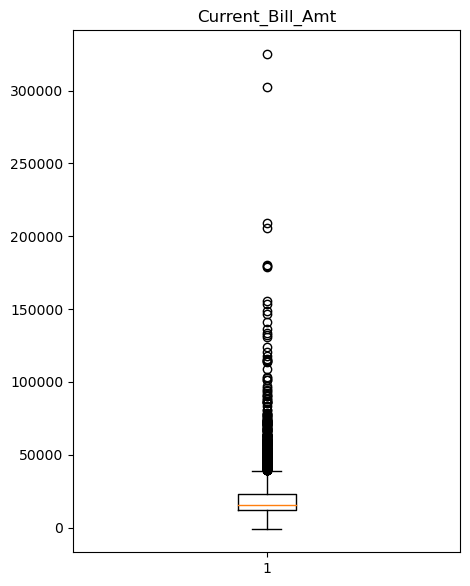

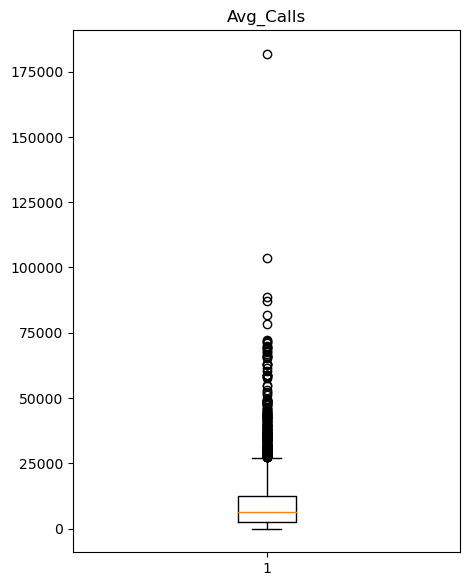

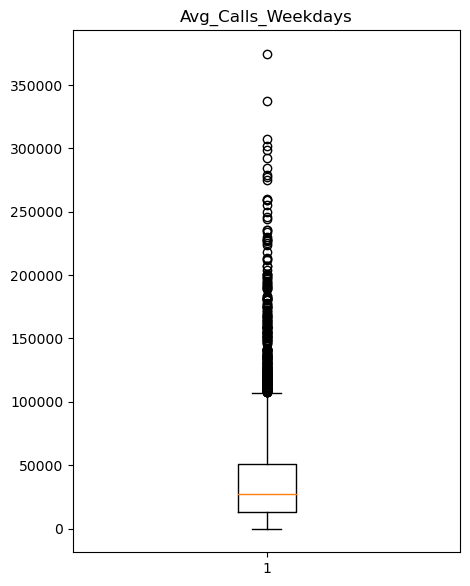

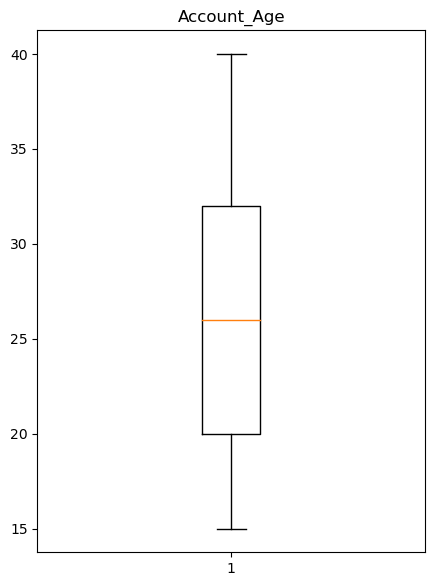

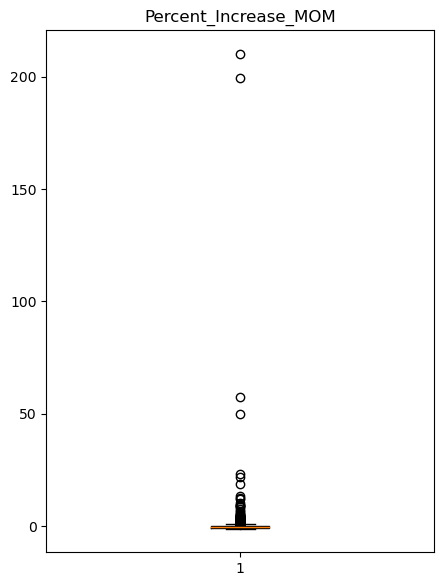

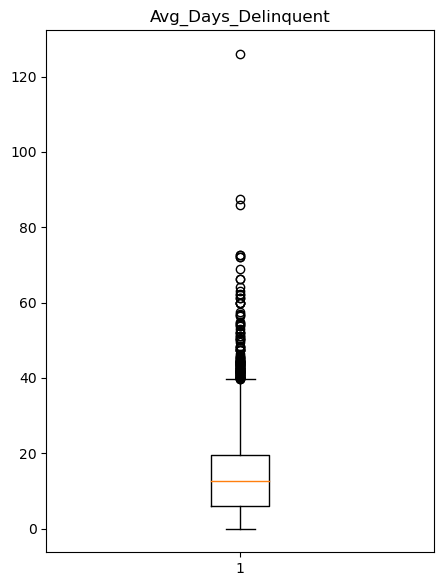

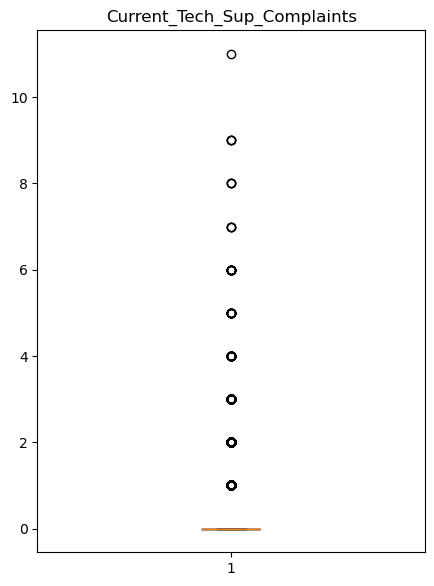

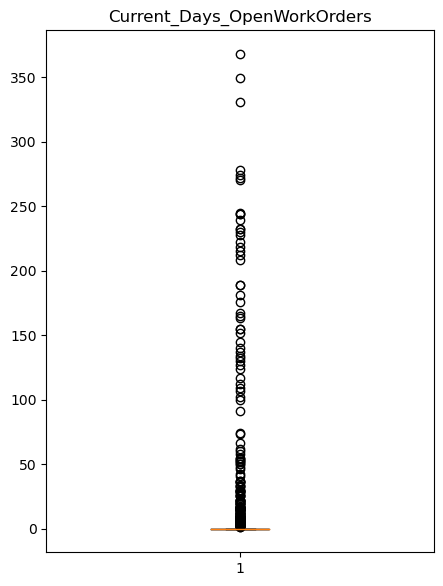

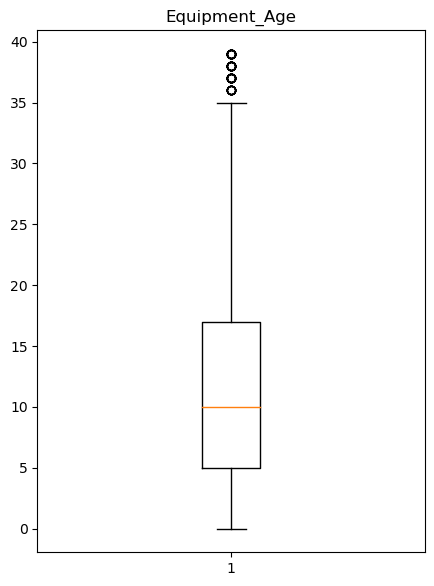

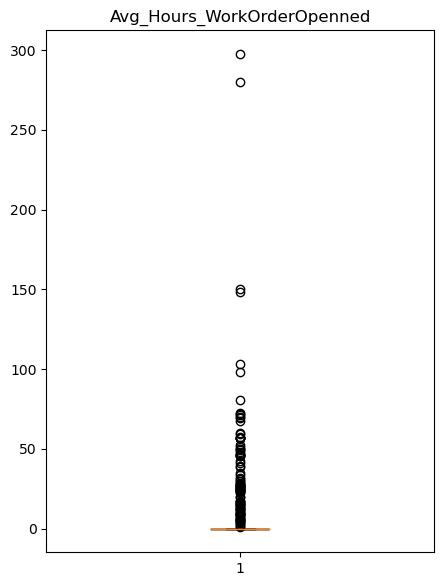

In [136]:

for i,x in enumerate(scale_columns):
    plt.figure(figsize=(5,80))
    plt.subplot(len(scale_columns) , 1 , i+1)
    plt.boxplot (data[x])
    plt.title(str(x))
    plt.show()

- Values of data which need to be scaled have too many outliers, so we are going to discover what the lost data if we are going to remove these records 

In [137]:
for feature in scale_columns:
    upper_limit = data[feature].mean()+ 3* data[feature].std()
    lower_limit = data[feature].mean()- 3* data[feature].std()
    print('outlier of ',feature, 'are :' ,   data[(data[feature] > upper_limit) | ( data[feature] < lower_limit)].shape[0])

outlier of  Current_Bill_Amt are : 67
outlier of  Avg_Calls are : 82
outlier of  Avg_Calls_Weekdays are : 97
outlier of  Account_Age are : 0
outlier of  Percent_Increase_MOM are : 7
outlier of  Avg_Days_Delinquent are : 48
outlier of  Current_Tech_Sup_Complaints are : 76
outlier of  Current_Days_OpenWorkOrders are : 47
outlier of  Equipment_Age are : 36
outlier of  Avg_Hours_WorkOrderOpenned are : 44


- Since the counts of outlier are small percentage of our data, we are going to proceed with deleting them 

In [138]:
for feature in scale_columns:
    upper_limit = data[feature].mean()+ 3* data[feature].std()
    lower_limit = data[feature].mean()- 3* data[feature].std()
    new_data = data[(data[feature] < upper_limit) & ( data[feature] > lower_limit)]
print( 'data records with Outliers are : ', data.shape[0])
print ('data records without Outliers are : ', new_data.shape[0])

data records with Outliers are :  4257
data records without Outliers are :  4213


- After cleaning our data and removing the missing values and outliers 
- We are ready to scale and encode the values of training data to be prepared for our prediction model

In [139]:
# define training and target data frame
train_df = new_data.iloc[:,1:]
# ['Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
#        'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
#        'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
#        'Current_Tech_Sup_Complaints', 'Current_Days_OpenWorkOrders',
#        'Equipment_Age', 'Condition_Current_Handset',
#        'Avg_Hours_WorkOrderOpenned']

target_df = new_data[['Target_Churn']]
train_df.head(2)

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Acct_Plan_Subtype,Complaint_Code,Avg_Days_Delinquent,Current_Tech_Sup_Complaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_Current_Handset,Avg_Hours_WorkOrderOpenned
0,0,14210,17950.0,30297.0,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,1,14407,0.0,0.0,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0


In [140]:
ohe = OneHotEncoder(sparse_output=False)
ord=OrdinalEncoder ()
scaler = StandardScaler()
target_new= ord.fit_transform(target_df)
col = make_column_transformer(
                                ( ohe , ohe_columns), 
                                ( ord , ord_columns ) ,
                                ( scaler , scale_columns),
                                 remainder='passthrough').set_output(transform='pandas')
train_new = col.fit_transform(train_df)
train_new.head(2)

,onehotencoder__Complaint_Code_Billing Problem,onehotencoder__Complaint_Code_Call Quality,onehotencoder__Complaint_Code_Check Account,onehotencoder__Complaint_Code_Inaccurate Sales Inf,onehotencoder__Complaint_Code_Moving,onehotencoder__Complaint_Code_Pricing,ordinalencoder__Acct_Plan_Subtype,standardscaler__Current_Bill_Amt,standardscaler__Avg_Calls,standardscaler__Avg_Calls_Weekdays,standardscaler__Account_Age,standardscaler__Percent_Increase_MOM,standardscaler__Avg_Days_Delinquent,standardscaler__Current_Tech_Sup_Complaints,standardscaler__Current_Days_OpenWorkOrders,standardscaler__Equipment_Age,standardscaler__Avg_Hours_WorkOrderOpenned,remainder__Target_Code,remainder__Condition_Current_Handset
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.327466,0.809480,-0.211558,-0.324823,-0.07491,-0.721828,-0.427004,-0.125094,-0.470833,-0.107117,0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.316149,-0.884976,-0.971191,0.234425,-0.00425,-1.199708,-0.427004,-0.125094,0.599915,-0.107117,1,1.0


- 

In [141]:
warnings.filterwarnings('ignore')
lr=LogisticRegression()
random = RandomForestClassifier(n_estimators=100,random_state=1, criterion='gini')
cross = cross_val_score (random, train_new, target_new , cv=10, scoring= 'accuracy')
cross

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [143]:
x_train = train_new[:2500]
y_train = target_new[0:2500]
x_test = train_new[2500:]
y_test = target_new[2500:]
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
score = confusion_matrix(prediction , y_test)
score


array([[914,   0],
       [  0, 799]], dtype=int64)

In [147]:
data[data['Target_Churn']=='Churn'].mean()

Target_Code                        1.000000
Current_Bill_Amt               20184.792326
Avg_Calls                       9410.960512
Avg_Calls_Weekdays             37865.139728
Account_Age                       25.591367
Percent_Increase_MOM              -0.265381
Avg_Days_Delinquent               19.209832
Current_Tech_Sup_Complaints        0.464748
Current_Days_OpenWorkOrders        2.741007
Equipment_Age                     12.255156
Condition_Current_Handset          1.018225
Avg_Hours_WorkOrderOpenned         0.921242
dtype: float64